# Kindle Books Dataset

In [649]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from IPython.display import display

In [4]:
dataset = pd.read_csv('kindle_data-v2.csv')

In [18]:
df = dataset.drop(['asin', 'imgUrl', 'productURL', 'category_id'], axis=1)
df.publishedDate = pd.to_datetime(dataset.publishedDate)
df

,title,author,soldBy,stars,reviews,price,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,4.8,0,9.99,False,True,False,False,2015-06-01,Parenting & Relationships
1,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,4.4,0,16.99,False,False,False,False,2022-02-15,Parenting & Relationships
2,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,4.8,0,16.99,False,False,True,False,2022-09-13,Parenting & Relationships
3,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,4.2,0,9.95,True,False,True,False,2020-02-25,Parenting & Relationships
4,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,4.7,0,13.99,False,False,False,False,2015-05-05,Parenting & Relationships
...,...,...,...,...,...,...,...,...,...,...,...,...
133097,Anna Karenina,Leo Tolstoy,De Marque,4.7,0,0.00,False,True,False,False,2023-09-15,Nonfiction
133098,Scary Smart: Scary Smart: The Future of Artifi...,Mo Gawdat,Amazon.com Services LLC,4.4,0,9.99,False,False,False,False,2021-09-30,Nonfiction
133099,The Count of Monte Cristo: The Original Unabri...,Alexandre Dumas,De Marque,4.8,0,1.99,False,True,False,False,2023-09-15,Nonfiction
133100,War And Peace,Leo Tolstoy,De Marque,4.7,0,0.00,False,True,False,False,2023-08-25,Nonfiction


In [57]:
df.isna().sum()

title                    0
author                 425
soldBy                9233
stars                    0
reviews                  0
price                    0
isKindleUnlimited        0
isBestSeller             0
isEditorsPick            0
isGoodReadsChoice        0
publishedDate        49016
category_name            0
dtype: int64

## Author

In [76]:
df.author.value_counts().describe()

count    72805.000000
mean         1.822361
std          3.289148
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        212.000000
Name: count, dtype: float64

In [82]:
res[res > 10].describe()

count    1106.000000
mean       20.504521
std        15.769679
min        11.000000
25%        13.000000
50%        16.000000
75%        22.000000
max       212.000000
Name: count, dtype: float64

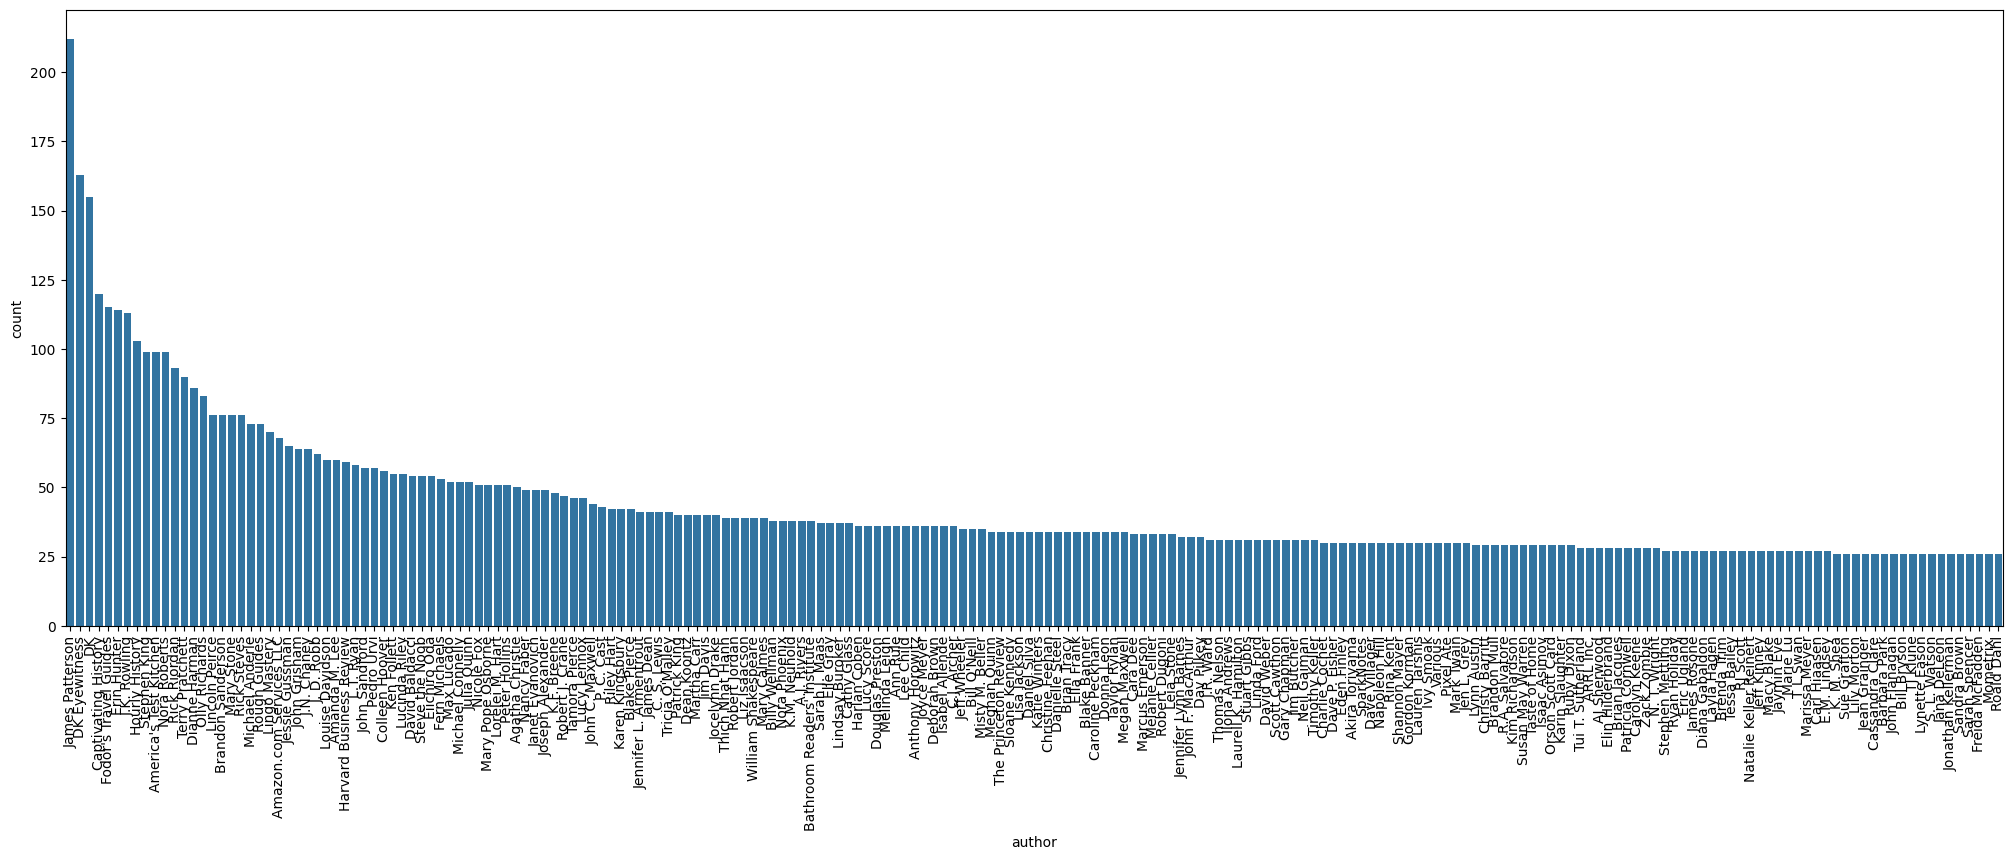

In [171]:
res = df.author.value_counts()
res2 = res[res > 25]
plt.subplots(figsize=(25,8))
ax = sns.barplot(x=res2.index, y=res2)
ax.tick_params(axis='x', rotation=90)

<Axes: ylabel='Frequency'>

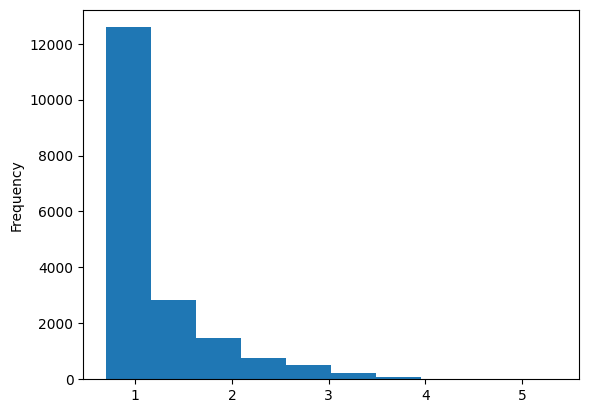

In [172]:
np.log(res[res > 1]).plot.hist()

## Soldby

In [111]:
df.soldBy.value_counts()

soldBy
Amazon.com Services LLC                    84759
Random House LLC                            5872
Hachette Book Group                         4736
Penguin Group (USA) LLC                     4385
HarperCollins Publishers                    4328
Macmillan                                   3147
Simon and Schuster Digital Sales Inc        3047
Penguin Random House Publisher Services     2390
JOHN WILEY AND SONS INC                     2386
Simon & Schuster Digital Sales Inc.         1748
Pearson Education,Inc.                      1312
HarperCollins Publishing                    1132
Penguin Random House Grupo Editorial         944
Cengage Learning                             750
Editorial Planeta, S.A.U.                    605
Harlequin Digital Sales Corp.                440
PRH UK                                       358
Macmillan Higher Education                   212
De Marque                                    194
Yen Press LLC                                162
Disney Book G

In [112]:
df.soldBy.isna().sum()

9233

In [124]:
dataset[df.soldBy.str.contains('Amazon Digital Services LLC', na=False)]

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
37197,B0062OCN4E,Ghettoside: A True Story of Murder in America,Jill Leovy,Amazon Digital Services LLC HN,https://m.media-amazon.com/images/I/918e60qR4M...,https://www.amazon.com/dp/B0062OCN4E,4.4,2864,12.99,False,9,False,True,False,2015-01-27,Biographies & Memoirs
75456,B007XJ77QG,The Study Quran: A New Translation and Commentary,Seyyed Hossein Nasr,Amazon Digital Services LLC GU,https://m.media-amazon.com/images/I/A1iUFz1fou...,https://www.amazon.com/dp/B007XJ77QG,4.7,1440,19.99,False,30,False,False,False,2015-11-17,Religion & Spirituality
78886,B006FP4PVY,What's Best Next: How the Gospel Transforms th...,Matt Perman,Amazon Digital Services LLC MK,https://m.media-amazon.com/images/I/71rqrDOs5w...,https://www.amazon.com/dp/B006FP4PVY,4.6,654,14.99,False,30,False,False,False,2014-03-04,Religion & Spirituality


In [136]:
pd.DataFrame(df.soldBy == 'Amazon.com Services LLC').corrwith(df['isEditorsPick'])

soldBy   -0.218075
dtype: float64

In [138]:
df[['isKindleUnlimited', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice']].corrwith(df.soldBy == 'Amazon.com Services LLC')

isKindleUnlimited    0.348496
isBestSeller         0.019950
isEditorsPick       -0.218075
isGoodReadsChoice   -0.107849
dtype: float64

In [149]:
print('Sold by Amazon')
print(df[df.soldBy == 'Amazon.com Services LLC'].isEditorsPick.value_counts(normalize=True))
print('')
print('Not sold by Amazon')
print(df[df.soldBy != 'Amazon.com Services LLC'].isEditorsPick.value_counts(normalize=True))

Sold by Amazon
isEditorsPick
False    0.990892
True     0.009108
Name: proportion, dtype: float64

Not sold by Amazon
isEditorsPick
False    0.899696
True     0.100304
Name: proportion, dtype: float64


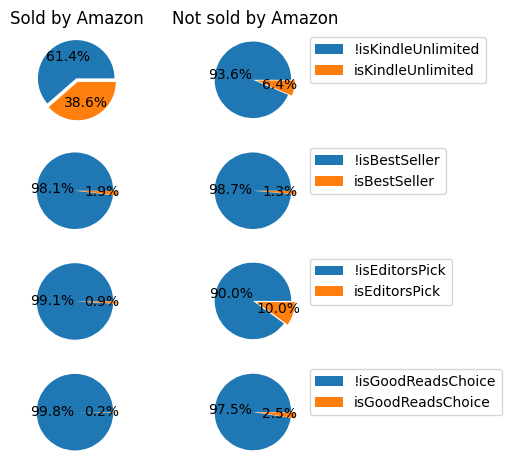

In [293]:
def piechart(counts, col=''):
    return counts.plot.pie(labels=['!'+col, col], ylabel='', labeldistance=None, autopct='%1.1f%%', explode=[0.05, 0.05])
    
groups = df.groupby(df.soldBy == 'Amazon.com Services LLC')
for i, col in enumerate(['isKindleUnlimited', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice']): 
    #print(groups[col].value_counts(normalize=True), end='\n\n')
    #plt.pie(groups[col].value_counts(normalize=True), labels=groups[col].value_counts(normalize=True).index.map(name_map(col)))
    value_counts = groups[col].value_counts()
    plt.subplot(4, 2, i*2+1)
    piechart(value_counts[True], col=col)
    plt.subplot(4, 2, i*2+2)
    ax = piechart(value_counts[False], col=col)
    ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax = plt.subplot(4, 2, 1)
ax.set_title('Sold by Amazon')
ax = plt.subplot(4, 2, 2)
ax.set_title('Not sold by Amazon')
plt.tight_layout()
plt.show()

## Duplicates

In [155]:
dataset[df.title.str.contains('Climate Change Law')]

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
122739,B072K2X85Z,International Climate Change Law,Daniel Bodansky,Amazon.com Services LLC,https://m.media-amazon.com/images/I/81V0dFVIqf...,https://www.amazon.com/dp/B072K2X85Z,4.6,0,54.99,False,20,False,False,False,2017-06-08,Law
123816,B0BMGVC3YF,Climate Change Law (Concepts and Insights),Daniel A. Farber,Amazon.com Services LLC,https://m.media-amazon.com/images/I/01RmK+J4pJ...,https://www.amazon.com/dp/B0BMGVC3YF,5.0,0,42.75,False,20,False,False,False,NaN,Law
124127,B078N6TL5C,Climate Change Law (Concepts and Insights),Daniel A. Farber,Amazon.com Services LLC,https://m.media-amazon.com/images/I/51i2rNtUJe...,https://www.amazon.com/dp/B078N6TL5C,5.0,0,42.75,False,20,False,False,False,NaN,Law


In [157]:
df[df.title.duplicated()]

,title,author,soldBy,stars,reviews,price,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
620,Scattered Minds: The Origins and Healing of At...,Gabor Maté,NaN,4.8,0,0.00,False,False,False,False,2019-01-03,Parenting & Relationships
2352,Nobody Loves Me: Bobby’s true story of neglect...,Maggie Hartley,NaN,4.8,0,0.00,False,False,False,False,2023-08-17,Parenting & Relationships
2516,Special Needs Trusts: Protect Your Child's Fin...,Kevin Urbatsch,Amazon.com Services LLC,4.4,0,16.99,False,False,False,False,2021-10-05,Parenting & Relationships
2918,Parenting Teens with Love and Logic: Preparing...,Jim Fay,Amazon.com Services LLC,4.6,0,13.20,False,False,False,False,2014-02-01,Parenting & Relationships
3950,What to Expect When You're Expecting,Heidi Murkoff,NaN,4.6,0,0.00,False,False,False,False,2016-05-31,Parenting & Relationships
...,...,...,...,...,...,...,...,...,...,...,...,...
133081,Plants vs. Zombies: Garden Warfare,Paul Tobin,NaN,4.7,0,8.49,False,False,False,False,2016-02-02,Children's eBooks
133094,Killers of the Flower Moon: Adapted for Young ...,David Grann,Random House LLC,4.6,0,9.99,False,False,True,False,2021-11-16,Nonfiction
133096,Everything Sad Is Untrue: (a true story),Daniel Nayeri,Amazon.com Services LLC,4.6,0,8.80,False,False,False,False,2020-08-25,Nonfiction
133100,War And Peace,Leo Tolstoy,De Marque,4.7,0,0.00,False,True,False,False,2023-08-25,Nonfiction


In [158]:
df[df.title.duplicated(keep=False)]

,title,author,soldBy,stars,reviews,price,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
19,What to Expect When You're Expecting,Heidi Murkoff,Hachette Book Group,4.8,0,11.99,False,False,False,False,NaT,Parenting & Relationships
30,Scattered Minds: The Origins and Healing of At...,Gabor Maté,Penguin Group (USA) LLC,4.7,0,13.99,False,False,False,False,2023-02-07,Parenting & Relationships
37,"The Daily Dad: 366 Meditations on Parenting, L...",Ryan Holiday,Penguin Group (USA) LLC,4.8,0,15.99,False,False,False,False,2023-05-02,Parenting & Relationships
60,Drama Free: A Guide to Managing Unhealthy Fami...,Nedra Glover Tawwab,Penguin Group (USA) LLC,4.8,0,15.99,False,False,True,False,2023-02-28,Parenting & Relationships
99,How to Talk to Anyone: 92 Little Tricks for Bi...,Leil Lowndes,NaN,4.5,0,0.00,False,False,False,False,2013-03-07,Parenting & Relationships
...,...,...,...,...,...,...,...,...,...,...,...,...
133081,Plants vs. Zombies: Garden Warfare,Paul Tobin,NaN,4.7,0,8.49,False,False,False,False,2016-02-02,Children's eBooks
133094,Killers of the Flower Moon: Adapted for Young ...,David Grann,Random House LLC,4.6,0,9.99,False,False,True,False,2021-11-16,Nonfiction
133096,Everything Sad Is Untrue: (a true story),Daniel Nayeri,Amazon.com Services LLC,4.6,0,8.80,False,False,False,False,2020-08-25,Nonfiction
133100,War And Peace,Leo Tolstoy,De Marque,4.7,0,0.00,False,True,False,False,2023-08-25,Nonfiction


In [163]:
dataset[df.title.str.contains('Pride and Prejudice')]

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
29314,B0CBT27417,The Seven Sins of Fitzwilliam Darcy: A Pride a...,Julie Cooper,Amazon.com Services LLC,https://m.media-amazon.com/images/I/81H0ahL-MR...,https://www.amazon.com/dp/B0CBT27417,4.6,233,5.95,True,5,False,False,False,2023-09-18,Literature & Fiction
29942,B0CGFB5BK5,Responsibility and Resentment: A Pride and Pre...,Melissa Anne,Amazon.com Services LLC,https://m.media-amazon.com/images/I/A1g1IvBDDP...,https://www.amazon.com/dp/B0CGFB5BK5,3.9,176,5.99,True,5,False,False,False,2023-09-15,Literature & Fiction
29973,B0CH8J3JXK,"The Husbands of Elizabeth Bennet, Volume One: ...",Christine Combe,Amazon.com Services LLC,https://m.media-amazon.com/images/I/81L6kPz8AQ...,https://www.amazon.com/dp/B0CH8J3JXK,4.5,240,5.99,True,5,False,False,False,2023-09-03,Literature & Fiction
30414,B0CD5WC4CK,To the Advantage of Both: A Pride and Prejudic...,Lory Lilian,Amazon.com Services LLC,https://m.media-amazon.com/images/I/61U9q4h-uJ...,https://www.amazon.com/dp/B0CD5WC4CK,4.4,776,5.75,True,5,False,False,False,2023-07-29,Literature & Fiction
30696,B0BRR21RQR,Mr. Darcy and the Governess: A Pride and Preju...,Alix James,Amazon.com Services LLC,https://m.media-amazon.com/images/I/71ioyEbVPo...,https://www.amazon.com/dp/B0BRR21RQR,4.6,50,4.99,True,5,False,False,False,NaN,Literature & Fiction
31145,B0C8P4Y8J1,A Pair of Sparkling Eyes: A Pride and Prejudic...,Andreea Catana,Amazon.com Services LLC,https://m.media-amazon.com/images/I/81tOWOoDXn...,https://www.amazon.com/dp/B0C8P4Y8J1,4.4,821,4.99,True,5,False,False,False,2023-07-20,Literature & Fiction
31211,B0C63N839L,A Matter of Prudence: A Variation of Jane Aust...,Lucy Marin,Amazon.com Services LLC,https://m.media-amazon.com/images/I/81FISeQOcy...,https://www.amazon.com/dp/B0C63N839L,4.2,555,5.95,True,5,False,False,False,NaN,Literature & Fiction
31306,B0C42GXVWQ,In Sickness and in Health: A Variation of Jane...,Frances Reynolds,Amazon.com Services LLC,https://m.media-amazon.com/images/I/81JqBqSaSx...,https://www.amazon.com/dp/B0C42GXVWQ,4.5,963,5.95,True,5,False,False,False,NaN,Literature & Fiction
31312,B0CGPBCR1L,Traces of Magic: A Pride and Prejudice Fantasy...,Monica Fairview,Amazon.com Services LLC,https://m.media-amazon.com/images/I/813IUh-VlN...,https://www.amazon.com/dp/B0CGPBCR1L,4.6,15,5.99,True,5,False,False,False,NaN,Literature & Fiction
31740,B0CD4Z32K1,The Second Mr. Darcy: A Pride and Prejudice Va...,Laraba Kendig,Amazon.com Services LLC,https://m.media-amazon.com/images/I/81jiXc5n8g...,https://www.amazon.com/dp/B0CD4Z32K1,4.4,327,3.99,True,5,False,False,False,NaN,Literature & Fiction


In [ ]:
# 0 reviews is usually not correct
# 0 price is always not correct? (or not sold anymore)
# Also multiple versions of the same book (do we consolidate or do we treat them separately)

## Correlations

In [324]:
numerical = ['stars', 'reviews', 'price', 'isKindleUnlimited', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice', 'publishedDate']

<Axes: >

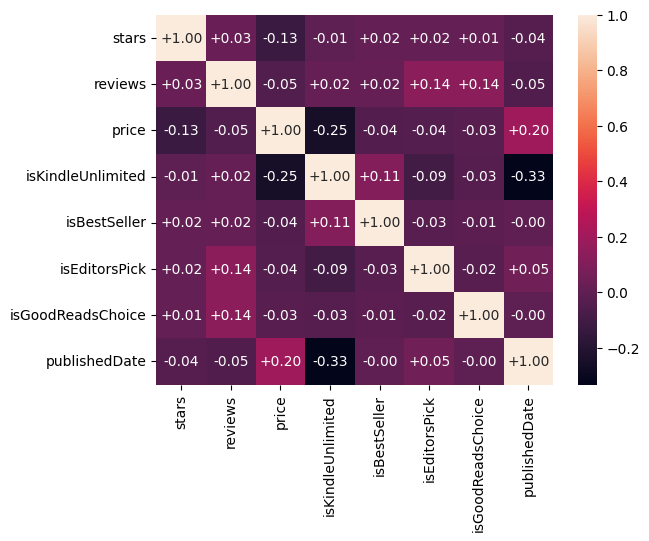

In [310]:
sns.heatmap(df[['stars', 'reviews', 'price', 'isKindleUnlimited', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice', 'publishedDate']].corr(), annot=True, fmt='+.2f')

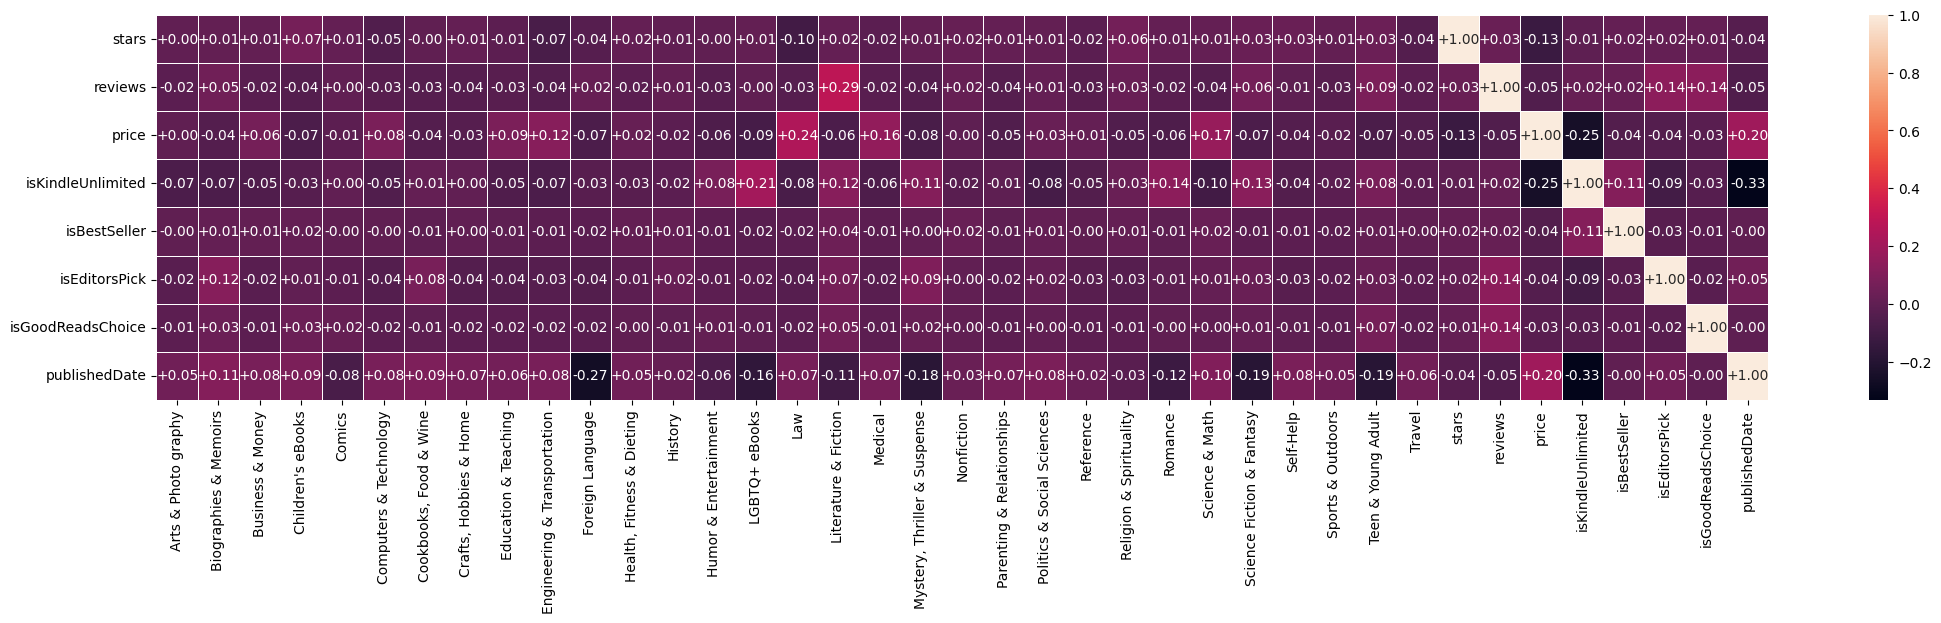

In [377]:
plt.subplots(figsize=(26,5))
ax = sns.heatmap(pd.get_dummies(df.category_name).join(df[numerical]).corr().iloc[31:], annot=True, fmt='+.2f', linewidth=.5)

## Missing values

In [386]:
df.isna().groupby(df.category_name).sum()

,title,author,soldBy,stars,reviews,price,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
category_name,,,,,,,,,,,,
Arts & Photo graphy,0,3,51,0,0,0,0,0,0,0,1173,0
Biographies & Memoirs,0,4,46,0,0,0,0,0,0,0,563,0
Business & Money,0,2,12,0,0,0,0,0,0,0,281,0
Children's eBooks,0,105,5747,0,0,0,0,0,0,0,937,0
Comics,0,7,7,0,0,0,0,0,0,0,465,0
Computers & Technology,0,18,44,0,0,0,0,0,0,0,1053,0
"Cookbooks, Food & Wine",0,8,59,0,0,0,0,0,0,0,842,0
"Crafts, Hobbies & Home",0,14,63,0,0,0,0,0,0,0,1169,0
Education & Teaching,0,5,39,0,0,0,0,0,0,0,1088,0


In [390]:
na_cols = df.isna().groupby(df.category_name).sum()[['author', 'soldBy', 'publishedDate']]
zero_cols = pd.DataFrame({
    'total': df.category_name.value_counts(),
    'reviews': (df.reviews == 0).groupby(df.category_name).sum(),
    'price': (df.price == 0).groupby(df.category_name).sum(),
})
zero_cols.join(na_cols)

,total,reviews,price,author,soldBy,publishedDate
category_name,,,,,,
Arts & Photo graphy,4916,122,109,3,51,1173
Biographies & Memoirs,5405,39,103,4,46,563
Business & Money,2577,2577,55,2,12,281
Children's eBooks,5747,5747,971,105,5747,937
Comics,478,0,8,7,7,465
Computers & Technology,5504,299,72,18,44,1053
"Cookbooks, Food & Wine",5333,4180,119,8,59,842
"Crafts, Hobbies & Home",5502,5088,128,14,63,1169
Education & Teaching,4986,177,54,5,39,1088


In [868]:
pd.DataFrame({
    'total': df.groupby(df.soldBy)['soldBy'].count(),
    'reviews': (df.reviews == 0).groupby(df.soldBy).sum(),
    'price': (df.price == 0).groupby(df.soldBy).sum(),
    'stars': (df.stars == 0).groupby(df.soldBy).sum()
}).sort_values(by='total', ascending=False)

,total,reviews,price,stars
soldBy,,,,
Amazon.com Services LLC,84759,40849,1293,2755
Random House LLC,5872,2500,15,8
Hachette Book Group,4736,2288,63,34
Penguin Group (USA) LLC,4385,2237,0,13
HarperCollins Publishers,4328,1777,20,8
Macmillan,3147,1280,0,5
Simon and Schuster Digital Sales Inc,3047,1383,5,3
Penguin Random House Publisher Services,2390,1118,10,25
JOHN WILEY AND SONS INC,2386,1381,0,74


## Reviews

In [534]:
dataset.sort_values(by='reviews', ascending=False).head(1000).describe()

,stars,reviews,price,category_id
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.507700,40809.751000,8.502550,10.773000
std,0.197306,38776.482765,5.117146,7.919861
min,3.600000,17185.000000,0.000000,1.000000
25%,4.400000,21408.500000,4.990000,5.000000
50%,4.500000,28911.500000,9.485000,5.000000
75%,4.625000,43392.000000,11.990000,16.000000
max,4.900000,618227.000000,39.990000,31.000000


In [536]:
dataset.reviews.describe(percentiles=[.25, .5, .75, .9, .99, .999, .9999, .99999, .999999])

count     133102.000000
mean         887.375779
std         5104.878777
min            0.000000
25%            0.000000
50%            4.000000
75%          365.000000
90%         1689.000000
99%        13752.990000
99.9%      65117.411000
99.99%    193390.907000
100%      294240.996410
100%      575432.765779
max       618227.000000
Name: reviews, dtype: float64

In [815]:
def test_transforms(transforms, df, bins=20):
    t_len = len(transforms)
    sqrt = np.sqrt(t_len)
    rows = int(np.floor(sqrt))
    cols = int(np.ceil(t_len/rows))

    plt.figure(figsize=(5*cols, 4*rows))
    for i, transform in enumerate(transforms):
        (name, fn) = transform
        plt.subplot(rows, cols, i+1)
        fn(df).plot.hist(bins=bins, title=name)
    plt.tight_layout()
    plt.show()

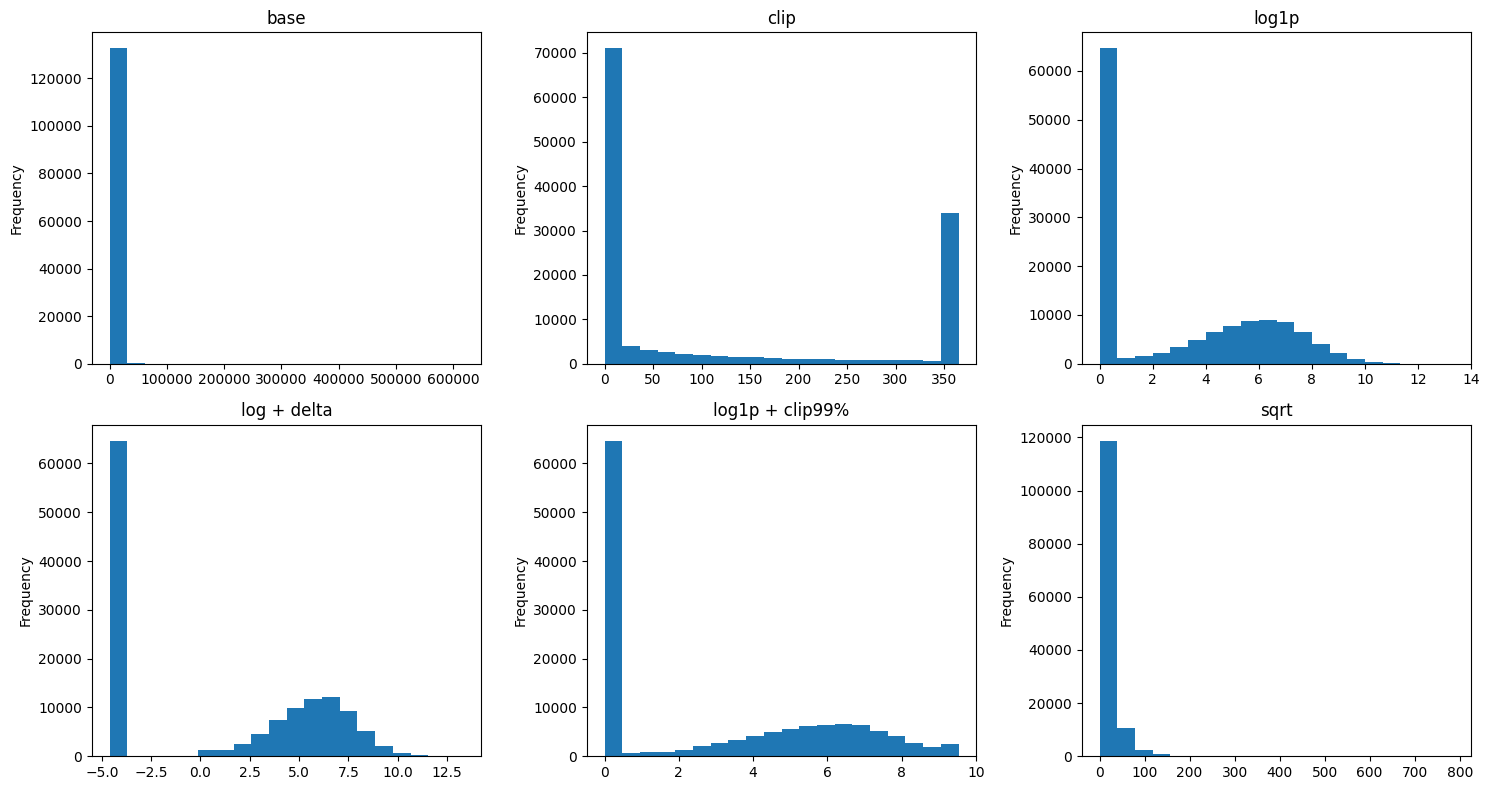

In [605]:
test_transforms([
    ('base', lambda x: x),
    ('clip', lambda x: x.clip(upper=365)),
    ('log1p', np.log1p),
    ('log + delta', lambda x: np.log(x+0.01)),
    ('log1p + clip99%', lambda x: np.log1p(x.clip(upper=13752))),
    ('sqrt', np.sqrt)
], dataset.reviews)

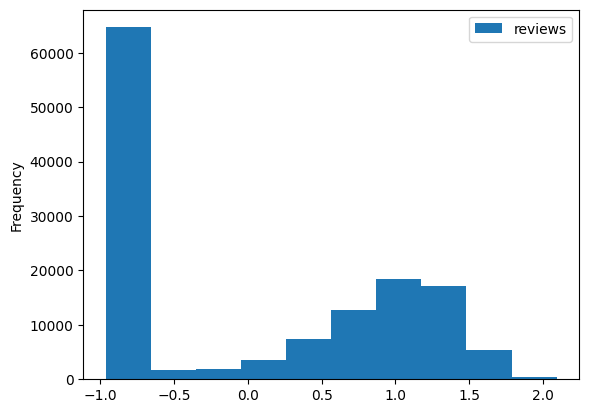

In [666]:
pt = PowerTransformer().set_output(transform='pandas')
pt.fit_transform(df[['reviews']]).plot.hist()
fig.tight_layout()

## Price

In [538]:
dataset.price.describe(percentiles=[.25, .5, .75, .9, .99, .999, .9999, .99999, .999999])

count     133102.000000
mean          15.134127
std           22.254986
min            0.000000
25%            4.990000
50%            9.990000
75%           14.990000
90%           30.390000
99%          101.649500
99.9%        282.988900
99.99%       401.407751
100%         653.721440
100%         679.337980
max          682.000000
Name: price, dtype: float64

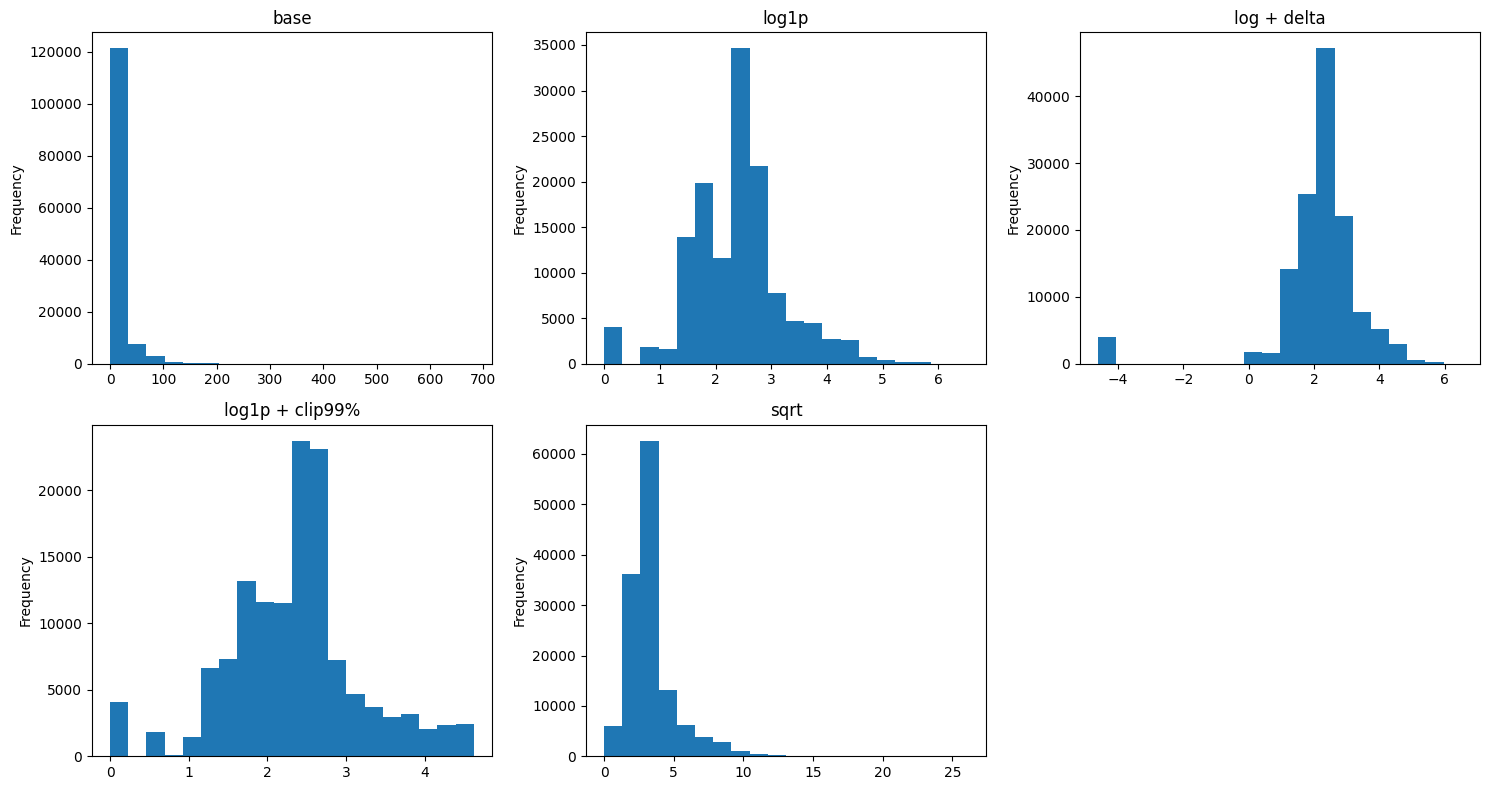

In [636]:
test_transforms([
    ('base', lambda x: x),
    ('log1p', np.log1p),
    ('log + delta', lambda x: np.log(x+0.01)),
    ('log1p + clip99%', lambda x: np.log1p(x.clip(upper=101))),
    ('sqrt', np.sqrt)
], dataset.price)

<Axes: ylabel='Frequency'>

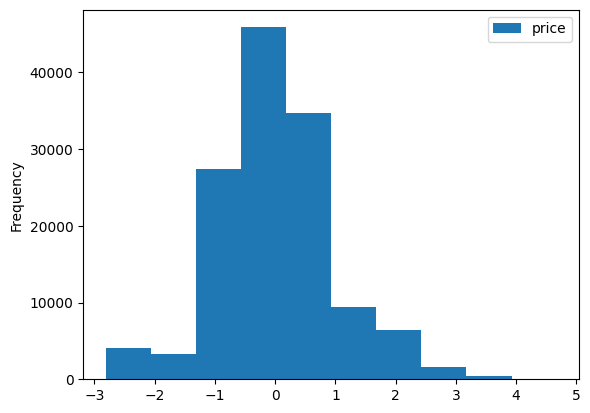

In [671]:
pt = PowerTransformer().set_output(transform='pandas')
pt.fit_transform(df[['price']]).plot.hist()

## Stars

In [611]:
dataset.stars.describe(percentiles=[.25, .5, .75, .9, .95, .99])

count    133102.000000
mean          4.404090
std           0.745646
min           0.000000
25%           4.400000
50%           4.500000
75%           4.700000
90%           4.800000
95%           4.900000
99%           5.000000
max           5.000000
Name: stars, dtype: float64

In [614]:
(dataset.stars == 0).sum()

3182

In [619]:
((dataset.stars < 4) & (dataset.stars != 0)).sum()

4070

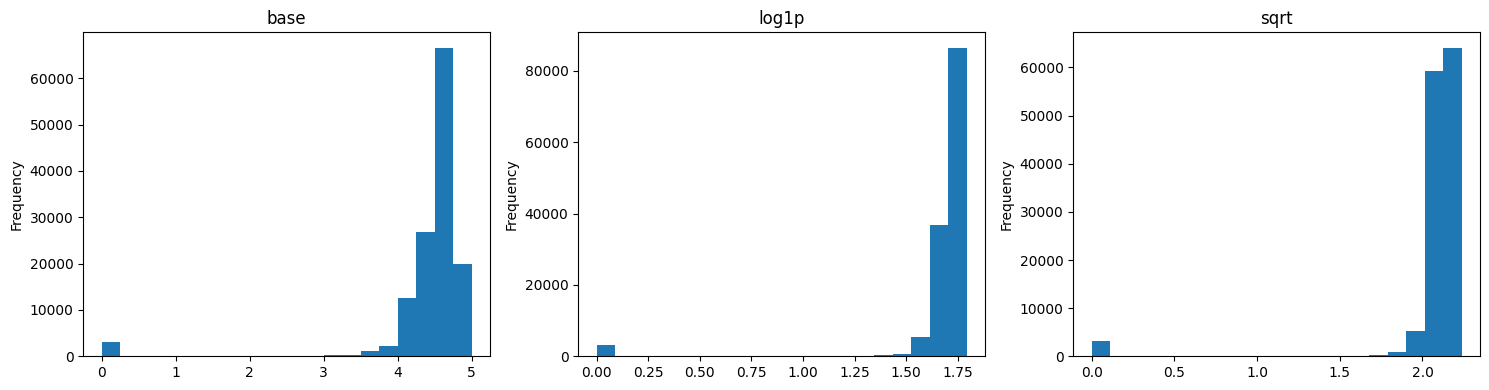

In [650]:
test_transforms([
    ('base', lambda x: x),
    ('log1p', np.log1p),
    ('sqrt', np.sqrt),
], dataset.stars)

<Axes: ylabel='Frequency'>

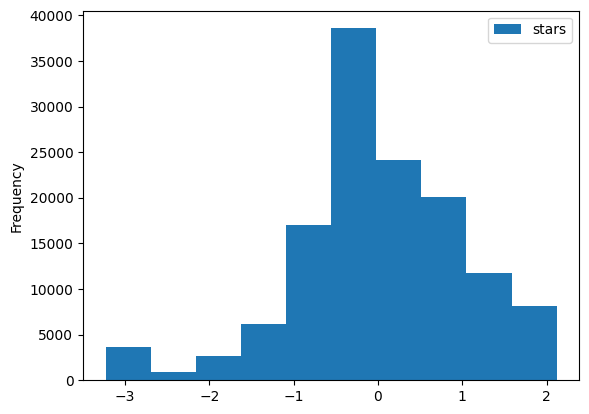

In [661]:
pt = PowerTransformer().set_output(transform='pandas')
pt.fit_transform(df[['stars']]).plot.hist()

## Boolean columns (isKindleUnlimited, isBestSeller, isEditorsPick, isGoodReadsChoice)

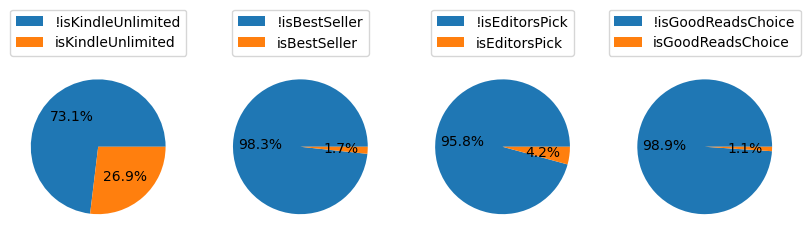

In [721]:
def piechart(counts, col=''):
    return counts.plot.pie(labels=['!'+col, col], ylabel='', labeldistance=None, autopct='%1.1f%%', legend=True)

bool_cols = df.select_dtypes(include=[bool]).columns
plt.figure(figsize=(10, 8))
for i, col in enumerate(bool_cols):
    plt.subplot(1,4,1+i)
    piechart(df[col].value_counts(), col).legend(bbox_to_anchor=(0.5, 1), loc='lower center')
plt.show()


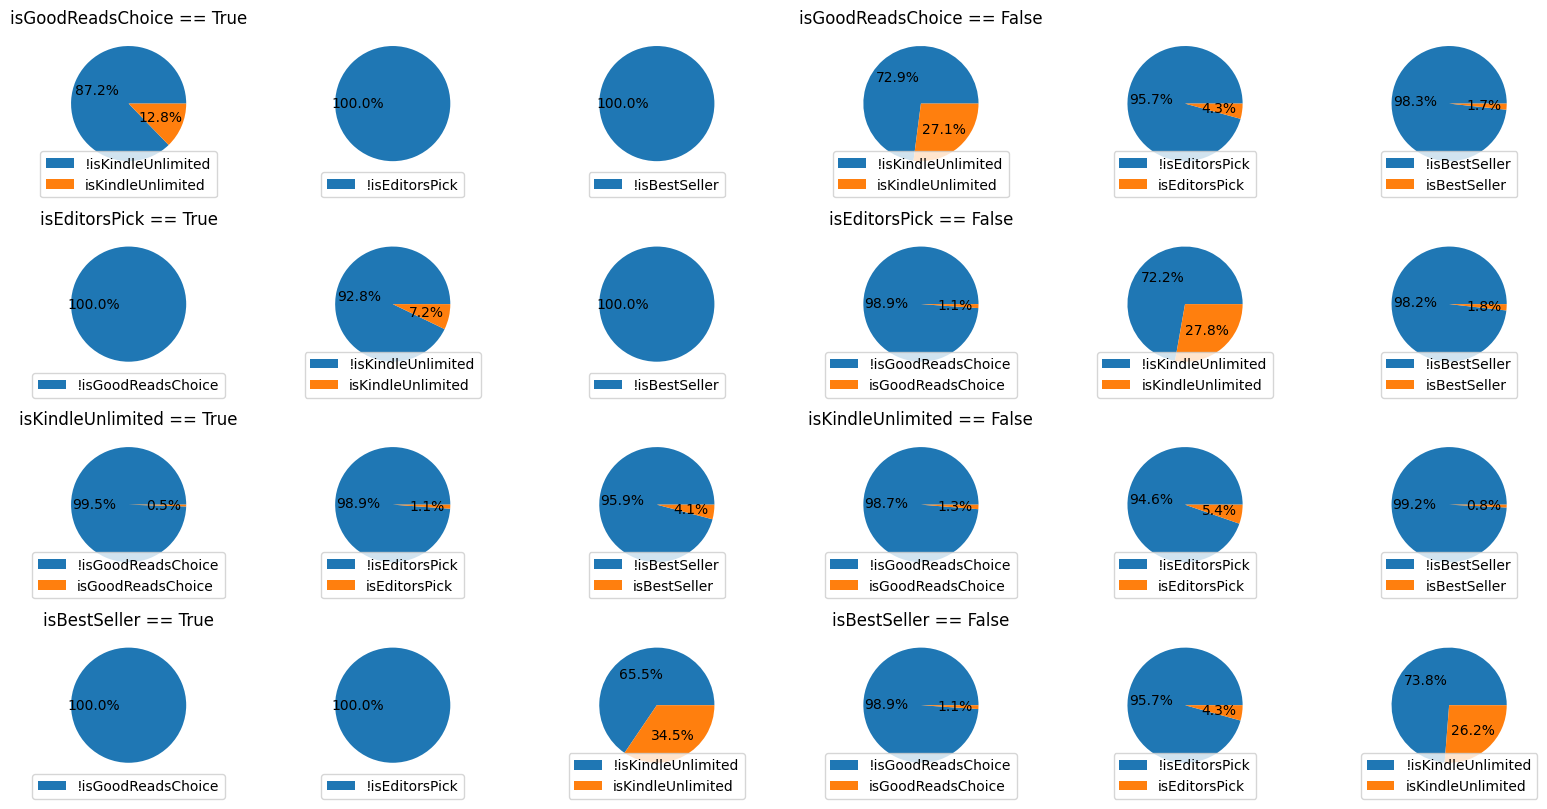

In [751]:
bool_cols = df.select_dtypes(include=[bool]).columns
plt.figure(figsize=(16, 16))
val = True
for i, main_col in enumerate(set(bool_cols)):
    for j, val in enumerate([True, False]):
        plt.subplot(8,6,1+i*6+j*3).set_title(f'{main_col} == {val}')
        for k, sub_col in enumerate(set(bool_cols) - set([main_col])):
            plt.subplot(8,6,1+i*6+j*3+k)
            piechart(df[df[main_col] == val][sub_col].value_counts(), sub_col).legend(bbox_to_anchor=(0.5, -0.2), loc='lower center')
plt.tight_layout()
plt.show()

isGoodReadsChoice, isEditorsPick i isBestSeller su medjusobno iskljuciva svojstva (mutually exclusive).
Samim tim nema smisla da ih tretiramo kao poene.
Eventualno mozemo da ih sve spojimo ukoliko su korelacije sa ostalim vrednostima slicne?

In [764]:
df.select_dtypes(include=[np.number, bool]).corr()

,stars,reviews,price,isKindleUnlimited,isBestSeller,isEditorsPick,isGoodReadsChoice
stars,1.000000,0.028204,-0.126705,-0.005341,0.015410,0.015917,0.014880
reviews,0.028204,1.000000,-0.050218,0.019092,0.020803,0.136059,0.135372
price,-0.126705,-0.050218,1.000000,-0.250226,-0.043774,-0.036759,-0.025135
isKindleUnlimited,-0.005341,0.019092,-0.250226,1.000000,0.113804,-0.093543,-0.032898
isBestSeller,0.015410,0.020803,-0.043774,0.113804,1.000000,-0.027448,-0.013487
isEditorsPick,0.015917,0.136059,-0.036759,-0.093543,-0.027448,1.000000,-0.021665
isGoodReadsChoice,0.014880,0.135372,-0.025135,-0.032898,-0.013487,-0.021665,1.000000


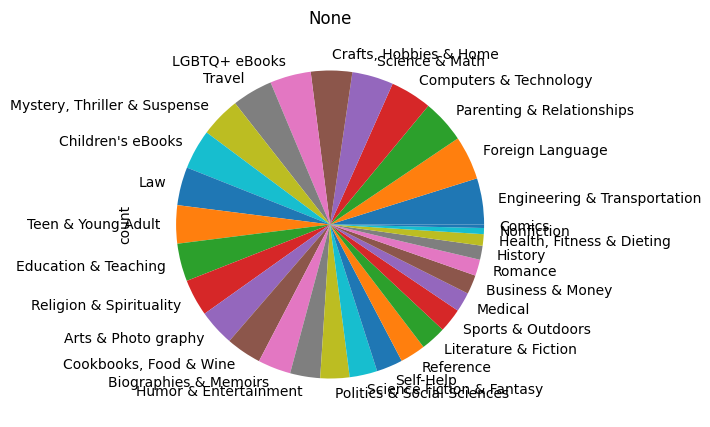

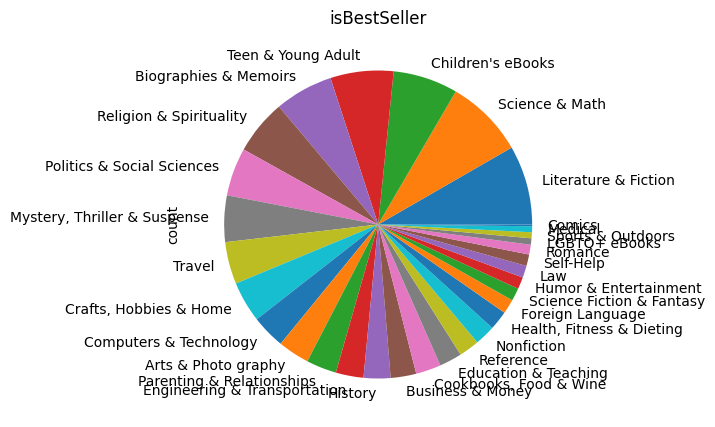

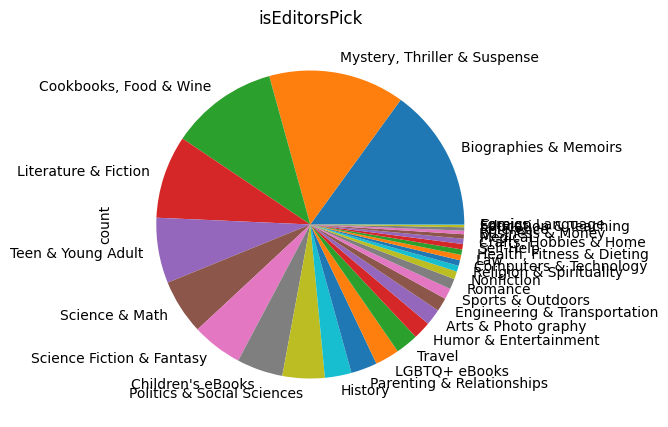

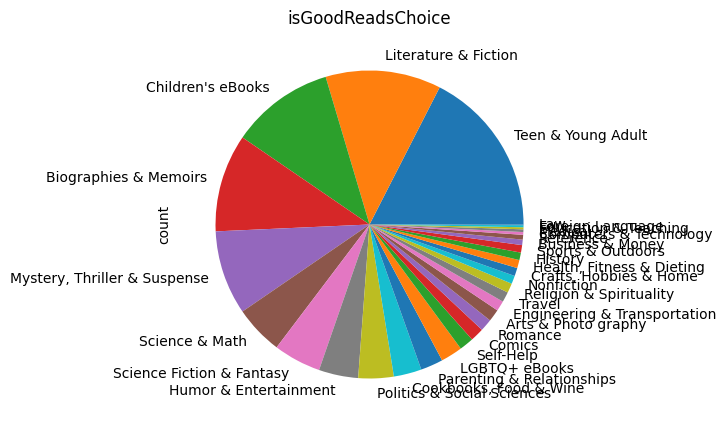

In [794]:
tags = pd.DataFrame()
tags['award'] = df.isBestSeller.map({True: 'isBestSeller', False: ''}) + df.isEditorsPick.map({True: 'isEditorsPick', False: ''}) + df.isGoodReadsChoice.map({True: 'isGoodReadsChoice', False: ''})
tags['award'] = tags.award.map(lambda x: x if x != '' else 'None')

for i, (group, gdf) in enumerate(df.groupby(tags.award)):
    plt.figure(figsize=(5, 5))
    gdf['category_name'].value_counts().plot.pie(title=group)
    plt.show()

<Axes: title={'center': 'Any award'}, ylabel='count'>

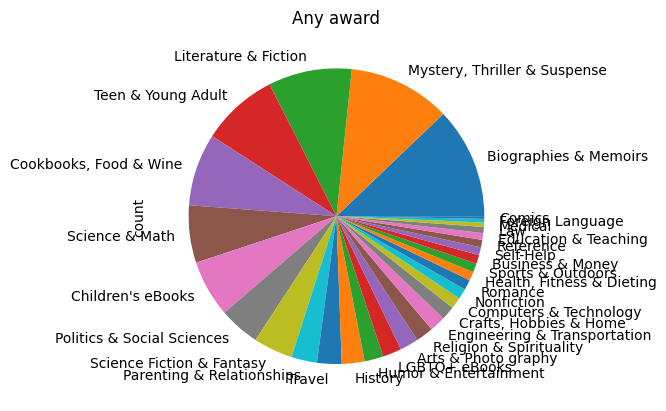

In [796]:
df[tags.award != 'None']['category_name'].value_counts().plot.pie(title='Any award')

<Axes: title={'center': 'General distribution'}, ylabel='count'>

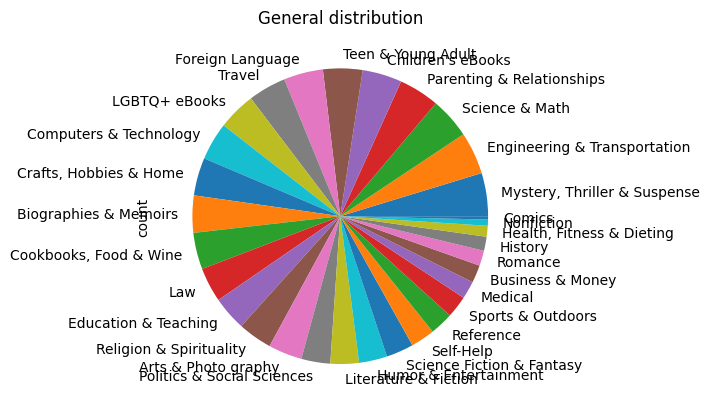

In [869]:
df['category_name'].value_counts().plot.pie(title='General distribution')

In [802]:
award_cnt = (tags.award != 'None').sum()
percent = award_cnt / len(tags)
award_cnt, percent

(9259, 0.06956319213836006)

## publishedDate

In [805]:
df.publishedDate.describe(percentiles=[.25, .5, .75, .9, .95, .99])

count                            84086
mean     2018-01-24 19:06:25.234164992
min                1806-01-01 00:00:00
25%                2015-02-15 00:00:00
50%                2019-10-12 00:00:00
75%                2022-06-07 00:00:00
90%                2023-06-01 00:00:00
95%                2023-08-18 00:00:00
99%                2023-09-21 00:00:00
max                2024-01-16 00:00:00
Name: publishedDate, dtype: object

In [806]:
df.publishedDate.isna().sum()

49016

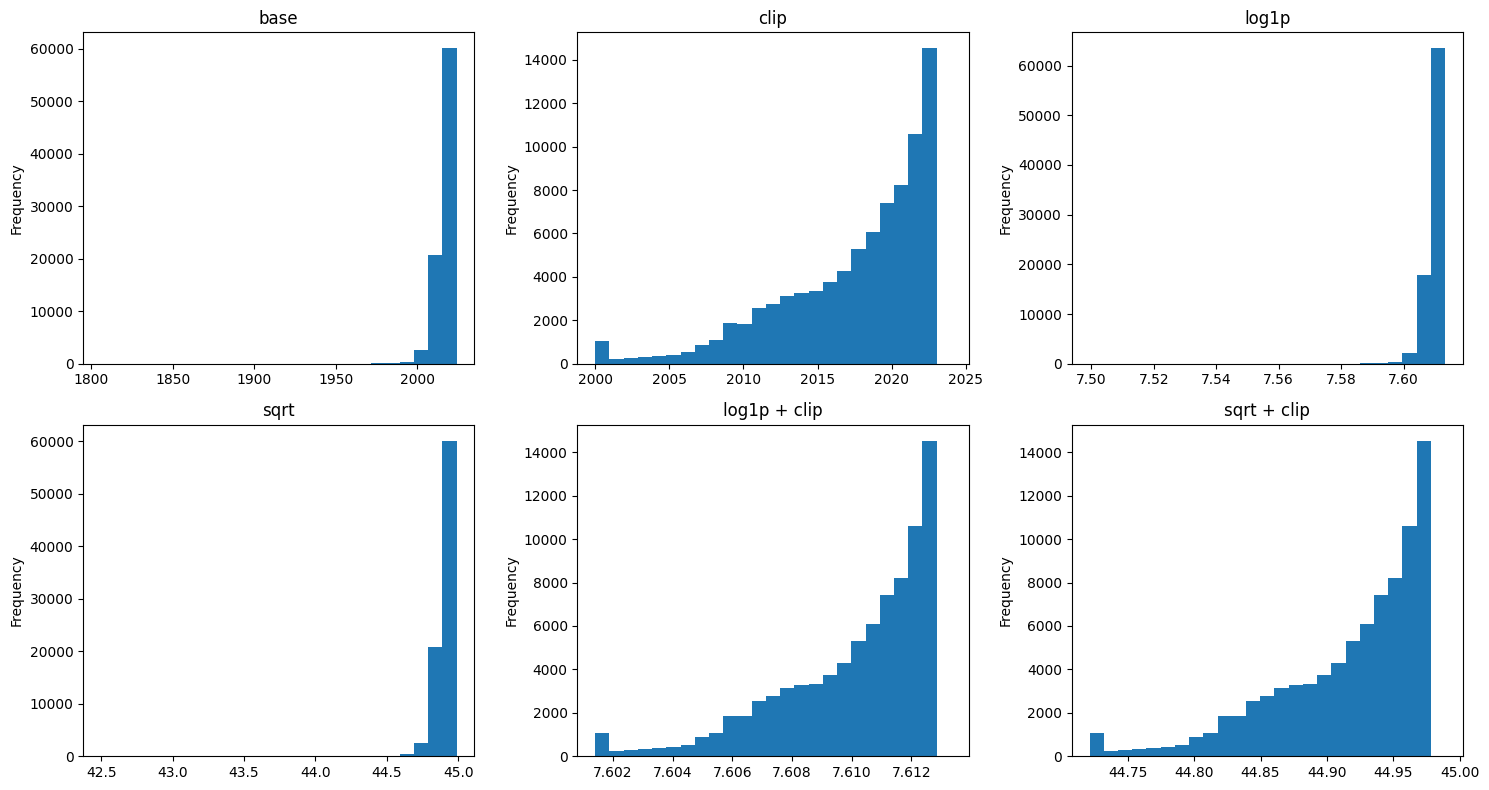

In [853]:
test_transforms([
    ('base', lambda x: x),
    ('clip', lambda x: x.clip(lower=2000)),
    ('log1p', np.log1p),
    ('sqrt', np.sqrt),
    ('log1p + clip', lambda x: np.log1p(x.clip(lower=2000))),
    ('sqrt + clip', lambda x: np.sqrt(x.clip(lower=2000))),
], df.publishedDate[~df.publishedDate.isna()].dt.year, bins=25)

In [850]:
def custom_date_transform(col):
    return col.dt.year + ((col.dt.month-1)/12)

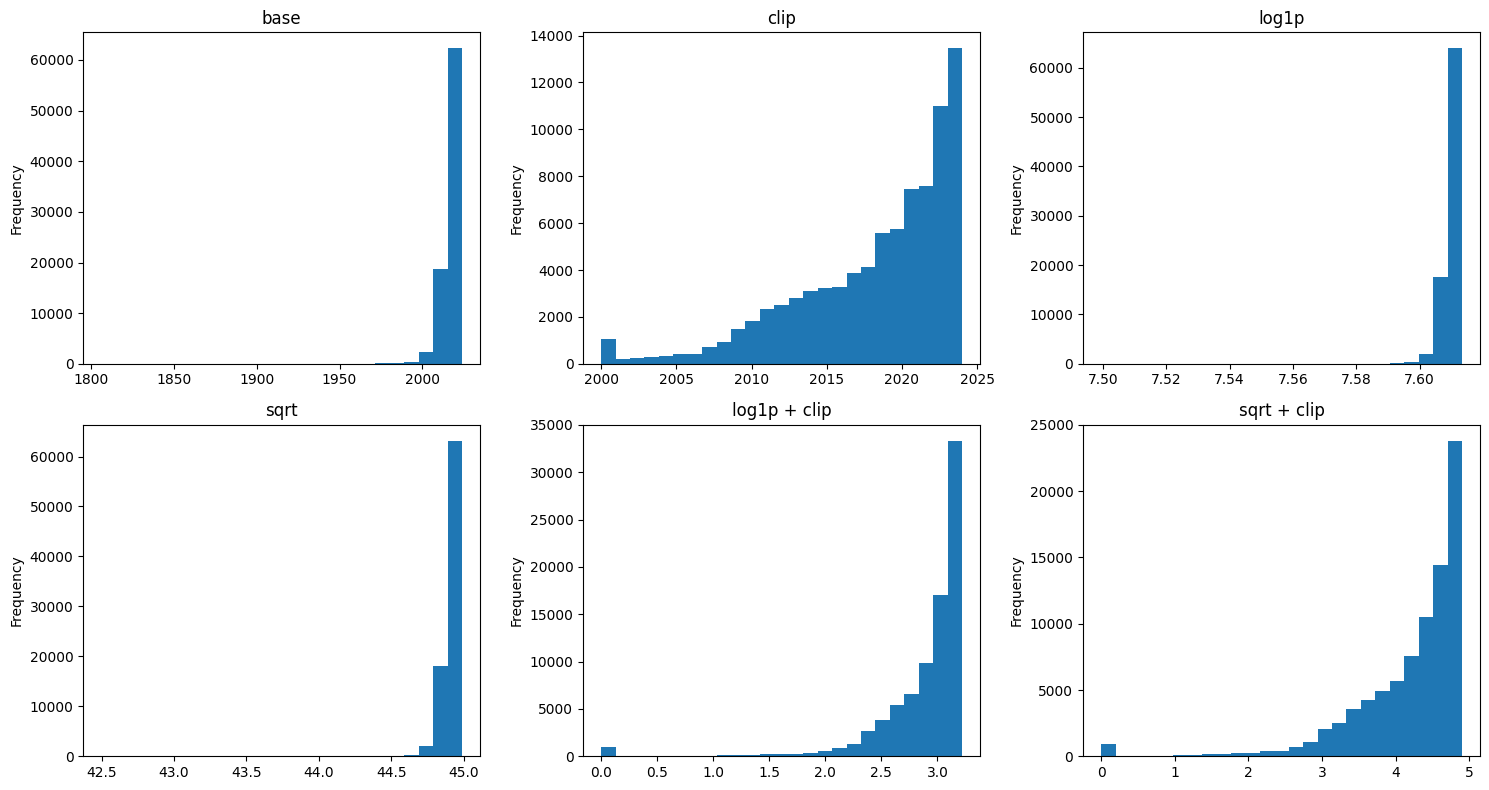

In [855]:
test_transforms([
    ('base', lambda x: x),
    ('clip', lambda x: x.clip(lower=2000)),
    ('log1p', np.log1p),
    ('sqrt', np.sqrt),
    ('log1p + clip', lambda x: np.log1p(x.clip(lower=2000)-2000)),
    ('sqrt + clip', lambda x: np.sqrt(x.clip(lower=2000)-2000)),
], custom_date_transform(df.publishedDate[~df.publishedDate.isna()]), bins=25)

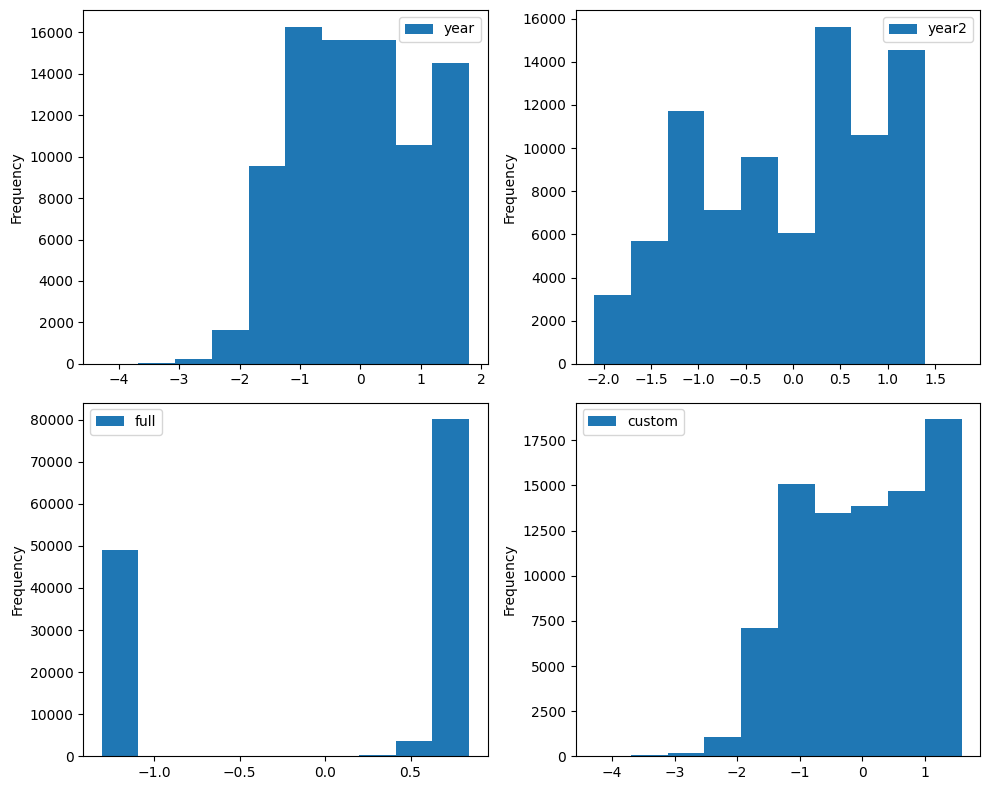

In [851]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

date = pd.DataFrame()
date['year'] = df['publishedDate'].dt.year
date['year2'] = df['publishedDate'].dt.year.clip(lower=2000)
date['full'] = df['publishedDate'].astype(int)
date['custom'] = custom_date_transform(df['publishedDate'])
pt = make_pipeline(
    StandardScaler().set_output(transform='pandas'),
    PowerTransformer().set_output(transform='pandas')
)
pt.fit_transform(date[['year']]).plot.hist(ax=axs[0,0])
pt.fit_transform(date[['year2']]).plot.hist(ax=axs[0,1])
pt.fit_transform(date[['full']]).plot.hist(ax=axs[1,0])
pt.fit_transform(date[['custom']]).plot.hist(ax=axs[1,1])
plt.tight_layout()